## **Classical and Quantum Walk on the Line**


*These simulations are intended to support a comparative analysis between classical and coined quantum walks within the scope of my bachelor's thesis.*

This notebook simulates a **classical random walk** and **Hadamard walk** on a 1D line. At each time step, a walker moves either **left (-1)** or **right (+1)**. By default, the walk is symmetric, meaning equal probability for both directions $(p = 0.5)$.


In [2]:
import hiperwalk as hpw
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

**1. Symmetric walk**


In [6]:
def classical_random_walk(n_steps=100, n_walks=100000, p_right=0.5):
    final_positions = []

    for _ in range(n_walks):
        steps = np.random.choice([-1, 1], size=n_steps, p=[1 - p_right, p_right])
        position = np.sum(steps)
        final_positions.append(position)

    counts = Counter(final_positions)
    positions = np.array(sorted(counts.keys()))
    probabilities = np.array([counts[pos] / n_walks for pos in positions])
    
    return positions, probabilities

Parameters including number of walks and number of steps.


In [5]:
n_walks = 100000
n_steps_list = [50, 100, 200, 465]

Plotting the probability distribution of final positions.

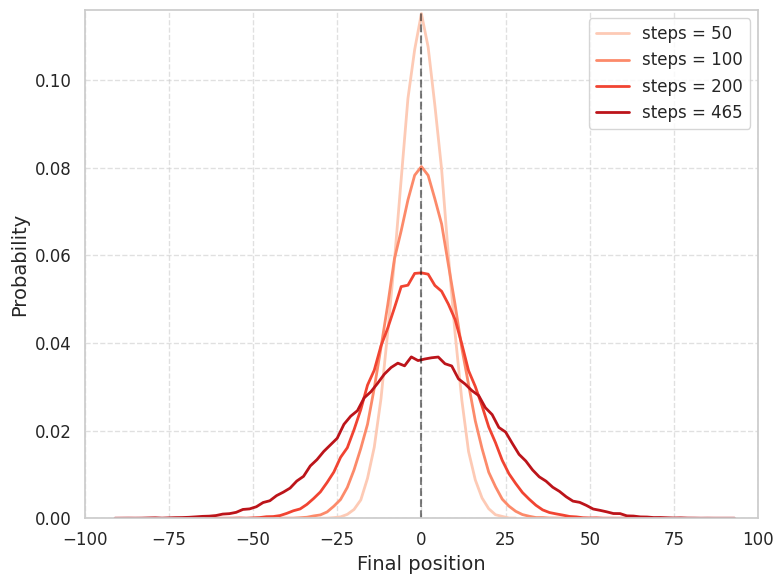

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

colors = sns.color_palette("Reds", n_colors=len(n_steps_list))

for i, n_steps in enumerate(n_steps_list):
    positions, probabilities = classical_random_walk(n_steps=n_steps, n_walks=n_walks, p_right=0.5)
    plt.plot(positions, probabilities, label=f'steps = {n_steps}', linewidth=2, color=colors[i])

plt.xlabel('Final position', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(probabilities) * 3.15)
plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('random_walk_symmetric.png', dpi=300, bbox_inches='tight')
plt.show()

**2. Classical vs Quantum Walk on a Line**


Define the Hadamard walk function. We define the initial state:

$$
\frac{\lvert (v, v + 1) \rangle + i \lvert (v, v - 1) \rangle}{\sqrt{2}},
$$

where 

$$
v = \left\lfloor \frac{n}{2} \right\rfloor
$$ 

is the central vertex. Note that the computational basis consists of arcs. This initial state is equivalent to a uniform superposition of the coin state when the walker is at vertex \(v\).  

The next command creates an initial state using the `ket` method, which requires an input `arc = (tail, head)`, where both `tail` and `head` are vertices. 


In [3]:
def quantum_hadamard_walk(n_steps=100):
    N = 2 * n_steps + 1
    line = hpw.Line(N)
    qw = hpw.Coined(line, coin='hadamard')
    
    v = N // 2
    ini_state = (qw.ket((v, v+1)) + 1j * qw.ket((v, v-1))) / np.sqrt(2)
    
    final_state = qw.simulate(time=n_steps, initial_state=ini_state)
    probs = qw.probability_distribution(final_state)
    
    if probs.ndim > 1:
        probs = probs[0]
    
    positions = np.arange(N) - v
    return positions, probs

Parameters including number of walks and number of steps.

In [4]:
n_steps = 100
n_walks = 100000

Simulate Classical walk and Hadamard walk after 100 steps.

In [7]:
# Classical
pos_classical, prob_classical = classical_random_walk(n_steps=n_steps, n_walks=n_walks)

# Quantum
pos_quantum, prob_quantum = quantum_hadamard_walk(n_steps=n_steps)

/opt/conda/lib/python3.11/site-packages/hiperwalk/quantum_walk/_pyneblina_interface.py:217: UserWarning: Real multiplication not implemented. Treating entries as complex.
  warn(
/opt/conda/lib/python3.11/site-packages/hiperwalk/quantum_walk/_pyneblina_interface.py:70: UserWarning: Real multiplication not implemented. Treating entries as complex.
  warn(


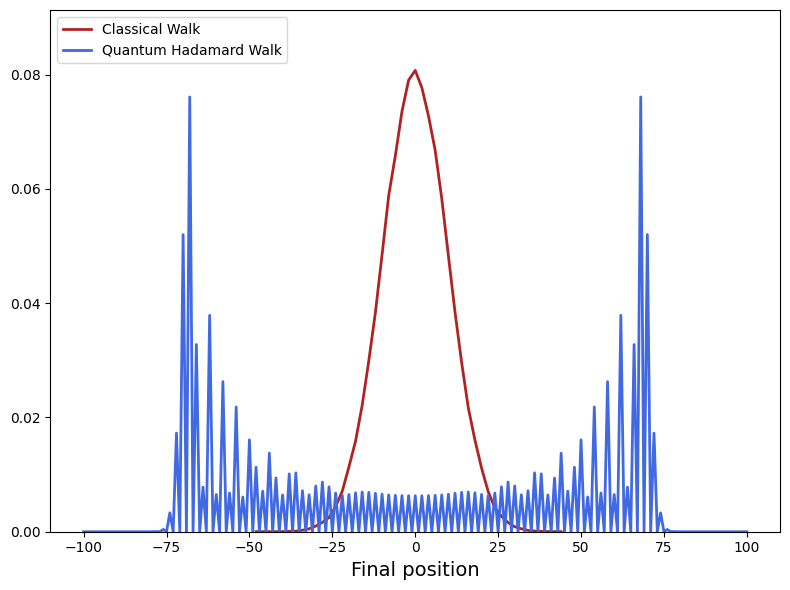

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(pos_classical, prob_classical, label='Classical Walk', color='firebrick', linewidth=2)
plt.plot(pos_quantum, prob_quantum, label='Quantum Hadamard Walk', color='royalblue', linewidth=2)
plt.grid(False) 
plt.legend(loc='upper left')
plt.ylim(0, max(prob_quantum) * 1.2)
plt.xlabel('Final position', fontsize=14)
plt.tight_layout()
plt.savefig('comparison.png', dpi=300, bbox_inches='tight')
plt.show()